In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

In [2]:
from ISLP import load_data

In [3]:
car = load_data('carseats')

In [4]:
car.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
car['Y'] = (car['Sales'] >=8).astype(int)

In [6]:
car['ShelveLoc_enc'] = LabelEncoder().fit_transform(car['ShelveLoc'])
car['Urban_enc'] = LabelEncoder().fit_transform(car['Urban'])
car['US_enc'] = LabelEncoder().fit_transform(car['US'])

In [7]:
car.drop(columns = ['ShelveLoc','Urban','US','Sales'],axis =1, inplace = True)

In [8]:
car.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Y,ShelveLoc_enc,Urban_enc,US_enc
0,138,73,11,276,120,42,17,1,0,1,1
1,111,48,16,260,83,65,10,1,1,1,1
2,113,35,10,269,80,59,12,1,2,1,1
3,117,100,4,466,97,55,14,0,2,1,1
4,141,64,3,340,128,38,13,0,0,1,0


In [9]:
Y = car['Y']
X = car.drop(['Y'],axis =1)

In [10]:
X.shape,Y.shape

((400, 10), (400,))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25,random_state = 39)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 10), (100, 10), (300,), (100,))

In [13]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
print("Results for the fitted DTree: ")
train_acc = dt.score(X_train,y_train)
test_acc = dt.score(X_test,y_test)
print(f"Train acc: {train_acc}")
print(f"Test acc: {test_acc}")

Results for the fitted DTree: 
Train acc: 1.0
Test acc: 0.65


Annotation(0.962963, 0.681818, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')


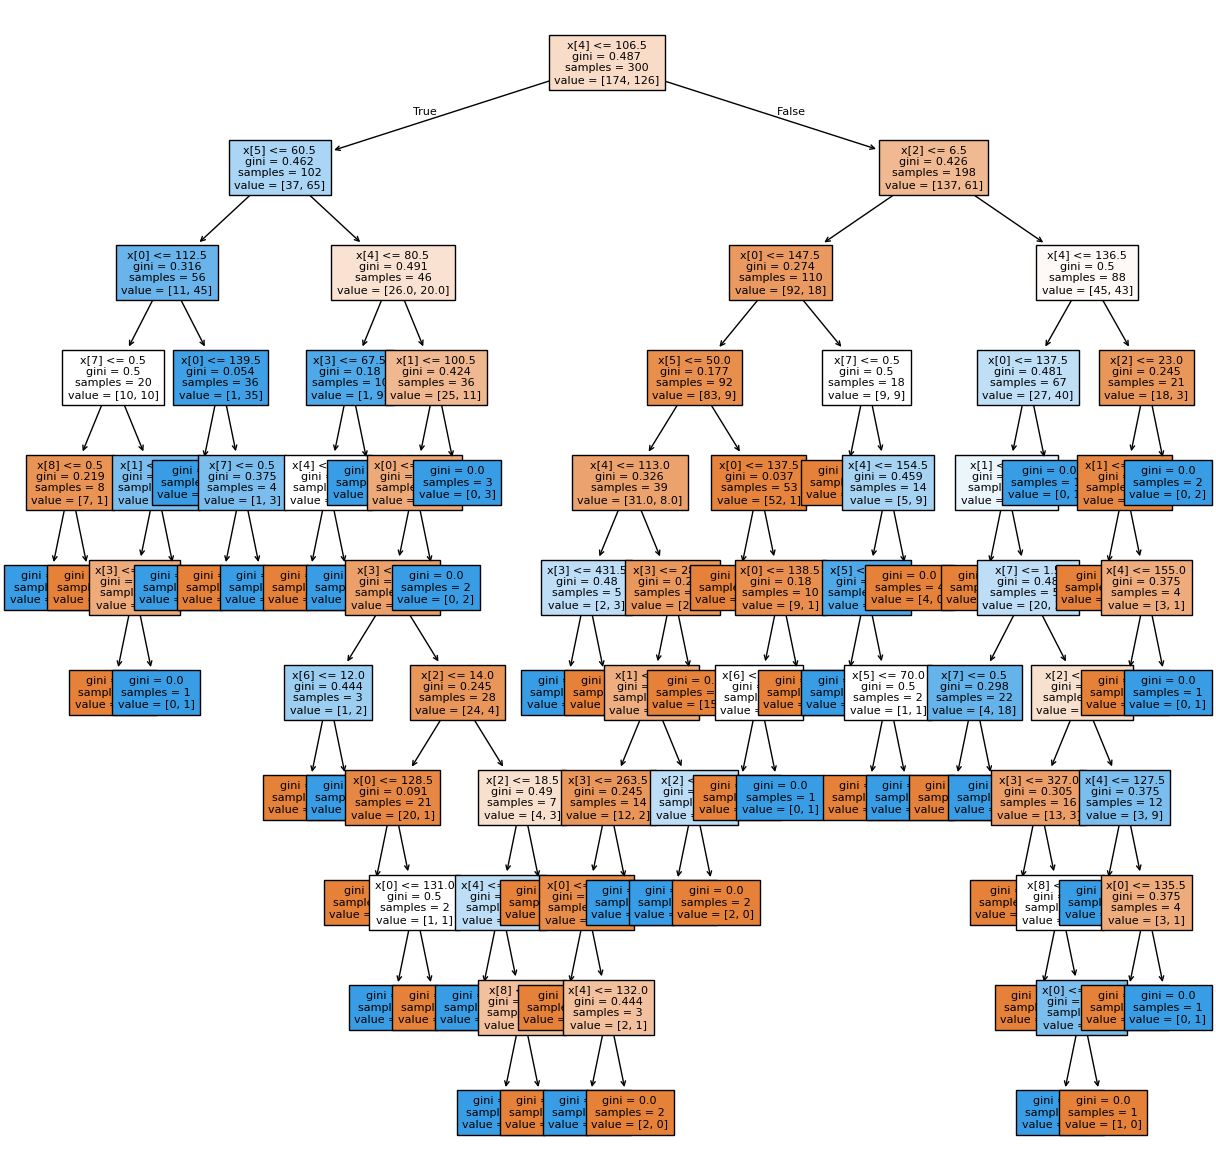

In [15]:
plt.figure(figsize = (15,15))
print(plot_tree(dt, filled = True, fontsize = 8)[-1])

In [16]:
dt.tree_.max_depth, dt.tree_.node_count

(10, 109)

In [17]:
path = dt.cost_complexity_pruning_path(X_train, y_train)

In [18]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0, 0.5, 'Total Impurities')

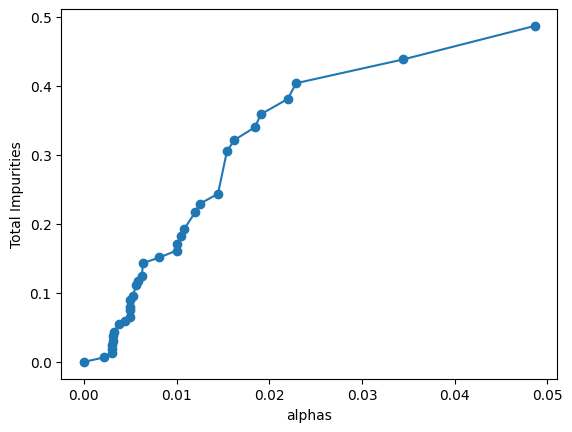

In [19]:
plt.plot(ccp_alphas, impurities,marker = 'o')
plt.xlabel(r"$\alpha$",fontsize =15)
plt.ylabel("Total Impurities")

In [20]:
ccp_alphas = np.unique(ccp_alphas)

In [21]:
ccp_alphas = ccp_alphas[:-1]
ccp_alphas

array([0.        , 0.00218029, 0.003     , 0.00307692, 0.00315789,
       0.0031746 , 0.00324074, 0.00380952, 0.00444444, 0.005     ,
       0.00501792, 0.00527473, 0.0056676 , 0.00583333, 0.00625   ,
       0.00638606, 0.00814598, 0.01      , 0.01052189, 0.01082707,
       0.012     , 0.0125    , 0.01446429, 0.0154371 , 0.0162332 ,
       0.01843639, 0.01911376, 0.02198537, 0.02289865, 0.03442593])

In [22]:
clfs = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha = alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)

In [23]:
len(clfs)

30

In [26]:
cv_scores = [np.mean(cross_val_score(clf, X_train,y_train, cv=5)) for clf in clfs]

Text(0, 0.5, 'Avg CV Acc.')

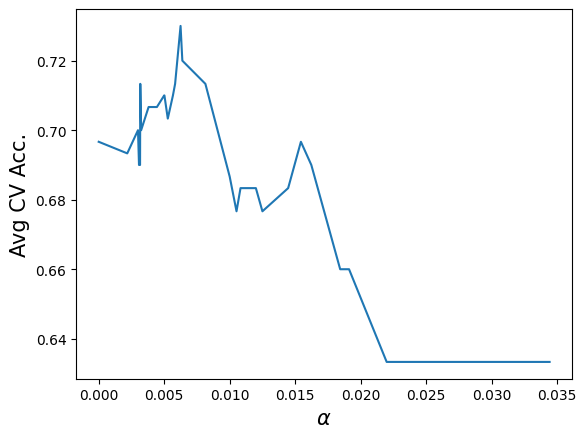

In [28]:
plt.plot(ccp_alphas,cv_scores)
plt.xlabel(r"$\alpha$",fontsize = 15)
plt.ylabel("Avg CV Acc.", fontsize = 15)

In [29]:
best_alpha = ccp_alphas[np.argmax(cv_scores)]

np.float64(0.00625)

In [ ]:
ccp_alphas

In [32]:
best_tree = DecisionTreeClassifier(ccp_alpha = best_alpha)
best_tree.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [33]:
print("Results for the best fitted DTree: ")
train_acc = best_tree.score(X_train,y_train)
test_acc = best_tree.score(X_test,y_test)
print(f"Train acc: {train_acc}")
print(f"Test acc: {test_acc}")

Results for the best fitted DTree: 
Train acc: 0.9266666666666666
Test acc: 0.67


In [34]:
best_tree.tree_.max_depth, best_tree.tree_.node_count

(8, 47)

[Text(0.4423076923076923, 0.9444444444444444, 'x[4] <= 106.5\ngini = 0.487\nsamples = 300\nvalue = [174, 126]'), Text(0.19230769230769232, 0.8333333333333334, 'x[5] <= 60.5\ngini = 0.462\nsamples = 102\nvalue = [37, 65]'), Text(0.3173076923076923, 0.8888888888888888, 'True  '), Text(0.11538461538461539, 0.7222222222222222, 'x[0] <= 112.5\ngini = 0.316\nsamples = 56\nvalue = [11, 45]'), Text(0.07692307692307693, 0.6111111111111112, 'x[7] <= 0.5\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'), Text(0.038461538461538464, 0.5, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'), Text(0.11538461538461539, 0.5, 'x[1] <= 68.0\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'), Text(0.07692307692307693, 0.3888888888888889, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'), Text(0.15384615384615385, 0.3888888888888889, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'), Text(0.15384615384615385, 0.6111111111111112, 'gini = 0.054\nsamples = 36\nvalue = [1, 35]'), Text(0.2692307692307692, 0.7222222222222222, 'x[4] <= 80.5\

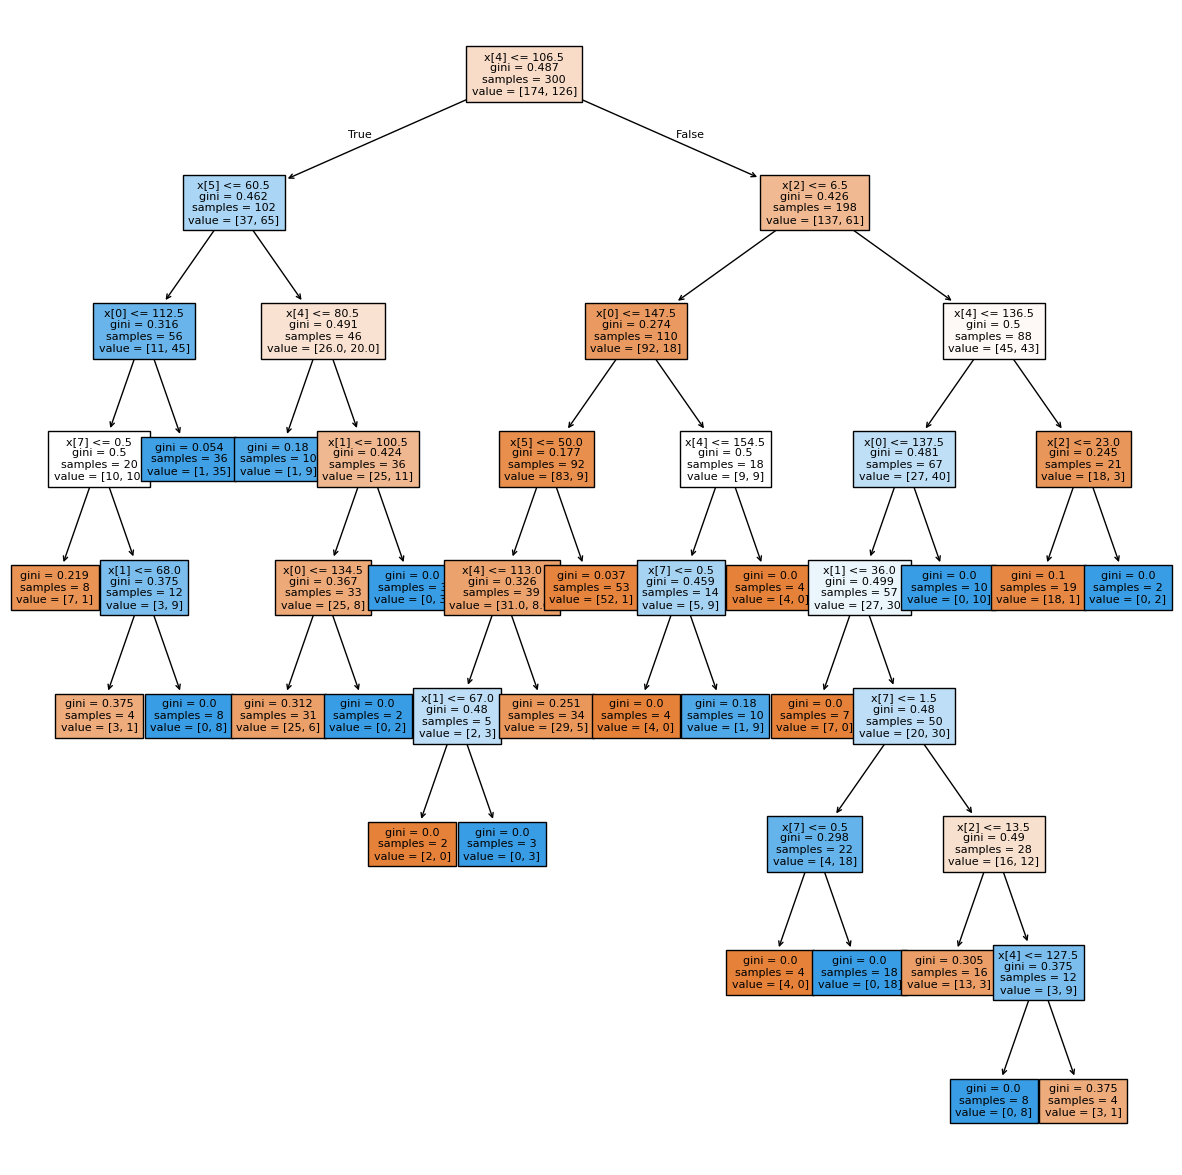

In [35]:
plt.figure(figsize = (15,15))
print(plot_tree(best_tree, filled = True, fontsize = 8))

In [37]:
node_counts = [clf.tree_.node_count for clf in clfs]
depths = [clf.tree_.max_depth for clf in clfs]

Text(0, 0.5, 'No. of Nodes')

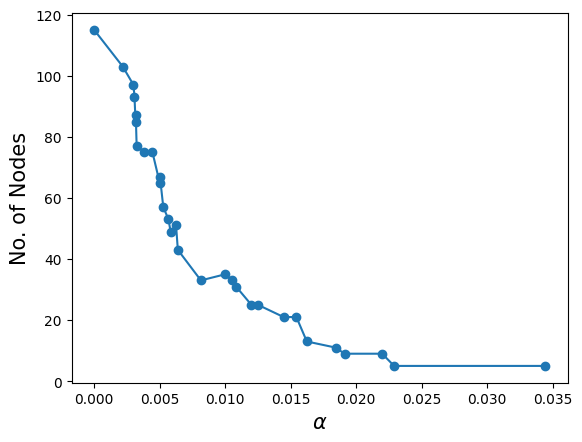

In [39]:
plt.plot(ccp_alphas,node_counts,marker ='o')
plt.xlabel(r"$\alpha$",fontsize = 15)
plt.ylabel("No. of Nodes", fontsize = 15)

Text(0, 0.5, 'Depth')

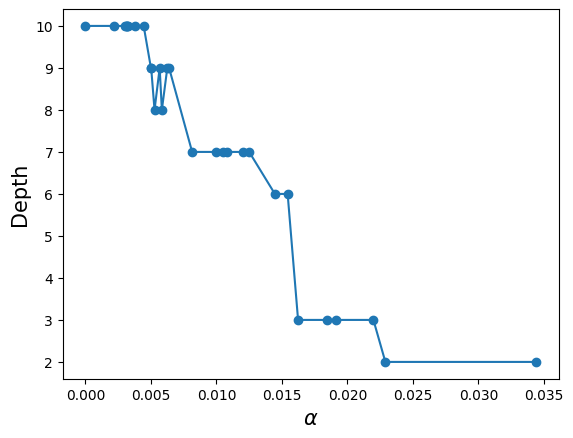

In [40]:
plt.plot(ccp_alphas,depths,marker ='o')
plt.xlabel(r"$\alpha$",fontsize = 15)
plt.ylabel("Depth", fontsize = 15)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs alpha for training and testing sets")
plt.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
plt.legend()
plt.show()

In [ ]:
pd.DataFrame({'Train acc': train_scores,
               'Test acc': test_scores,
               'Nodes': node_counts,
               'Depth': depths,
               'ccp_alphas': ccp_alphas,
               'CV_acc': cv_scores})

### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [44]:
model.score(X_train,y_train),model.score(X_test,y_test)

(0.8333333333333334, 0.82)

In [45]:
from sklearn.datasets import load_breast_cancer

In [46]:
data = load_breast_cancer()

In [50]:
X,Y = data.data,data.target

In [52]:
X.shape,Y.shape

((569, 30), (569,))